#Importing Libraries

In [13]:
!pip install -q tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.1 MB/s eta 0:00:00


In [14]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 24.6 MB/s eta 0:00:00


In [15]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optmizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

#Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/')



##Reading Data

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",header= None , delimiter = ',', encoding = "Latin1")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [3]:
print(df)

         0           1                             2         3  \
0        0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599995  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                       4                                                  5  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't up

##Cleaning Data

In [2]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Let's Drop the columns

In [3]:
df = df.drop(["id","date","query","user_id"], axis = 1 )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [12]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [5]:
df['sentiment'] = df['sentiment'].replace(4, 1)

In [14]:
df["sentiment"].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

We have balanced sentiment labels

In [6]:
df_sample = df.sample(n=10000, random_state=42)

In [7]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 541200 to 117202
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  int64 
 1   text       10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [9]:
df_sample["sentiment"].value_counts()

0    5004
1    4996
Name: sentiment, dtype: int64

Data Reduction.

In [10]:
for index, row in df_sample.head(10).iterrows():
    print('text:', row['text'])
    print('label:', row['sentiment'])

text: @chrishasboobs AHHH I HOPE YOUR OK!!! 
label: 0
text: @misstoriblack cool , i have no tweet apps  for my razr 2
label: 0
text: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
label: 0
text: School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
label: 0
text: upper airways problem 
label: 0
text: Going to miss Pastor's sermon on Faith... 
label: 0
text: on lunch....dj should come eat with me 
label: 1
text: @piginthepoke oh why are you feeling like that? 
label: 0
text: gahh noo!peyton needs to live!this is horrible 
label: 0
text: @mrstessyman thank you glad you like it! There is a product review bit on the site  Enjoy knitting it!
label: 1


In [8]:
import re

def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()
    return text


In [ ]:
df['text']= df["text"].apply(clean_tweet)

In [9]:
df_sample['text']= df_sample["text"].apply(clean_tweet)

#Splitting dataset

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_sample, test_size= 0.2, random_state = 42 )
test_df, val_df = train_test_split(test_df, test_size = 0.5, random_state = 42)

In [11]:
train_df.info()
val_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1221061 to 1013061
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  8000 non-null   int64 
 1   text       8000 non-null   object
dtypes: int64(1), object(1)
memory usage: 187.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 587799 to 1427297
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1000 non-null   int64 
 1   text       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1568171 to 125949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1000 non-null   int64 
 1   text       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [33]:
train_df['sentiment'].value_counts()

0    4024
1    3976
Name: sentiment, dtype: int64

In [34]:
val_df['sentiment'].value_counts()


0    502
1    498
Name: sentiment, dtype: int64

In [35]:
test_df['sentiment'].value_counts()

1    522
0    478
Name: sentiment, dtype: int64

In [16]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42


train_ds = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['sentiment'].values))
train_ds = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['text'].values, val_df['sentiment'].values))
val_ds = val_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_df['text'].values, test_df['sentiment'].values))
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

#Text classification with an RNN

In [37]:
for example, label in train_ds.take(1):
    print('texts: ', example[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  tf.Tensor(
[b'time to start driving shortly should make springfield mo tonight '
 b'hello becauseimtaylor and ttango via jhesset hime ohhai how are you '
 b'cleveland is out '], shape=(3,), dtype=string)

labels:  [1 1 0]


In [38]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [39]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'to', 'the', 'my', 'you', 'it', 'and', 'is', 'in',
       'for', 'on', 'of', 'that', 'me', 'so', 'have', 'but', 'just', 'i'],
      dtype='<U13')

In [40]:
print(example[:3])
encoded_example = encoder(example[:3]).numpy()
encoded_example

tf.Tensor(
[b'time to start driving shortly should make springfield mo tonight '
 b'hello becauseimtaylor and ttango via jhesset hime ohhai how are you '
 b'cleveland is out '], shape=(3,), dtype=string)


array([[ 48,   2, 217, 958,   1, 129, 134,   1,   1, 121,   0],
       [496,   1,   7,   1, 770,   1,   1,   1,  71,  34,   5],
       [  1,   8,  33,   0,   0,   0,   0,   0,   0,   0,   0]])

In [41]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))


Original:  b'time to start driving shortly should make springfield mo tonight '
Round-trip:  time to start driving [UNK] should make [UNK] [UNK] tonight 
Original:  b'hello becauseimtaylor and ttango via jhesset hime ohhai how are you '
Round-trip:  hello [UNK] and [UNK] via [UNK] [UNK] [UNK] how are you
Original:  b'cleveland is out '
Round-trip:  [UNK] is out        


In [42]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [43]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [44]:
history = model.fit(train_ds, epochs=30,
                    validation_data = val_ds)

Epoch 1/30
250/250 [==============================] - 14s 27ms/step - loss: 0.6894 - accuracy: 0.5870 - val_loss: 0.6795 - val_accuracy: 0.6220
Epoch 2/30
250/250 [==============================] - 4s 17ms/step - loss: 0.6212 - accuracy: 0.6984 - val_loss: 0.6131 - val_accuracy: 0.6860
Epoch 3/30
250/250 [==============================] - 4s 17ms/step - loss: 0.5422 - accuracy: 0.7588 - val_loss: 0.5903 - val_accuracy: 0.7120
Epoch 4/30
250/250 [==============================] - 4s 16ms/step - loss: 0.5031 - accuracy: 0.7794 - val_loss: 0.5799 - val_accuracy: 0.7100
Epoch 5/30
250/250 [==============================] - 4s 17ms/step - loss: 0.4804 - accuracy: 0.7875 - val_loss: 0.5764 - val_accuracy: 0.7130
Epoch 6/30
250/250 [==============================] - 4s 17ms/step - loss: 0.4666 - accuracy: 0.7959 - val_loss: 0.5743 - val_accuracy: 0.7180
Epoch 7/30
250/250 [==============================] - 4s 17ms/step - loss: 0.4562 - accuracy: 0.7995 - val_loss: 0.5743 - val_accuracy: 0.722

In [45]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.7138554140925407)

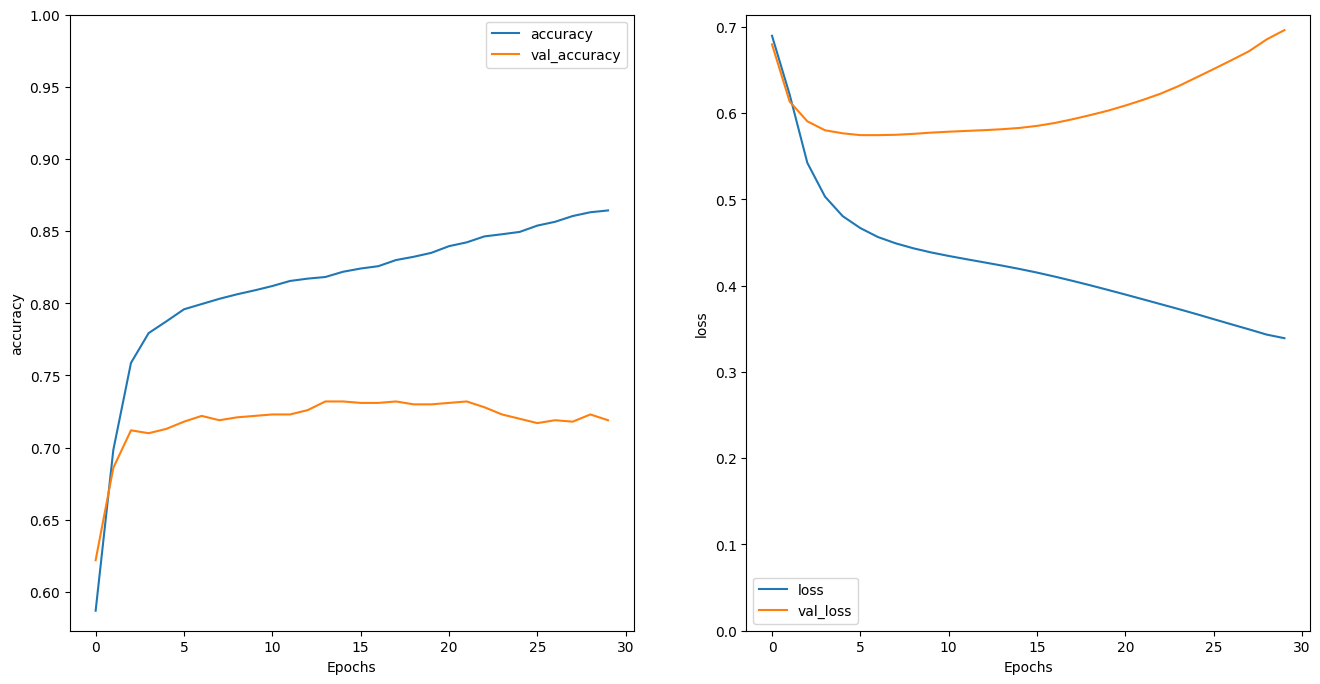

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [47]:
sample_text = ('he is a bad person')
predictions = model.predict(np.array([sample_text]))
predictions

1/1 [==============================] - 2s 2s/step


array([[0.32376987]], dtype=float32)

#Stack two or more LSTM layers

In [48]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [49]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [50]:
history = model.fit(train_ds, epochs=30,
                    validation_data=val_ds,
                    validation_steps=30)

Epoch 1/30
250/250 [==============================] - 28s 50ms/step - loss: 0.6930 - accuracy: 0.5181 - val_loss: 0.6929 - val_accuracy: 0.5344
Epoch 2/30
250/250 [==============================] - 8s 30ms/step - loss: 0.6928 - accuracy: 0.5371 - val_loss: 0.6926 - val_accuracy: 0.5479
Epoch 3/30
250/250 [==============================] - 7s 30ms/step - loss: 0.6924 - accuracy: 0.5574 - val_loss: 0.6923 - val_accuracy: 0.5562
Epoch 4/30
250/250 [==============================] - 8s 31ms/step - loss: 0.6919 - accuracy: 0.5811 - val_loss: 0.6918 - val_accuracy: 0.5750
Epoch 5/30
250/250 [==============================] - 8s 30ms/step - loss: 0.6911 - accuracy: 0.6010 - val_loss: 0.6910 - val_accuracy: 0.5865
Epoch 6/30
250/250 [==============================] - 8s 30ms/step - loss: 0.6901 - accuracy: 0.6176 - val_loss: 0.6899 - val_accuracy: 0.6031
Epoch 7/30
250/250 [==============================] - 8s 31ms/step - loss: 0.6884 - accuracy: 0.6359 - val_loss: 0.6882 - val_accuracy: 0.611

(0.0, 0.7020588248968125)

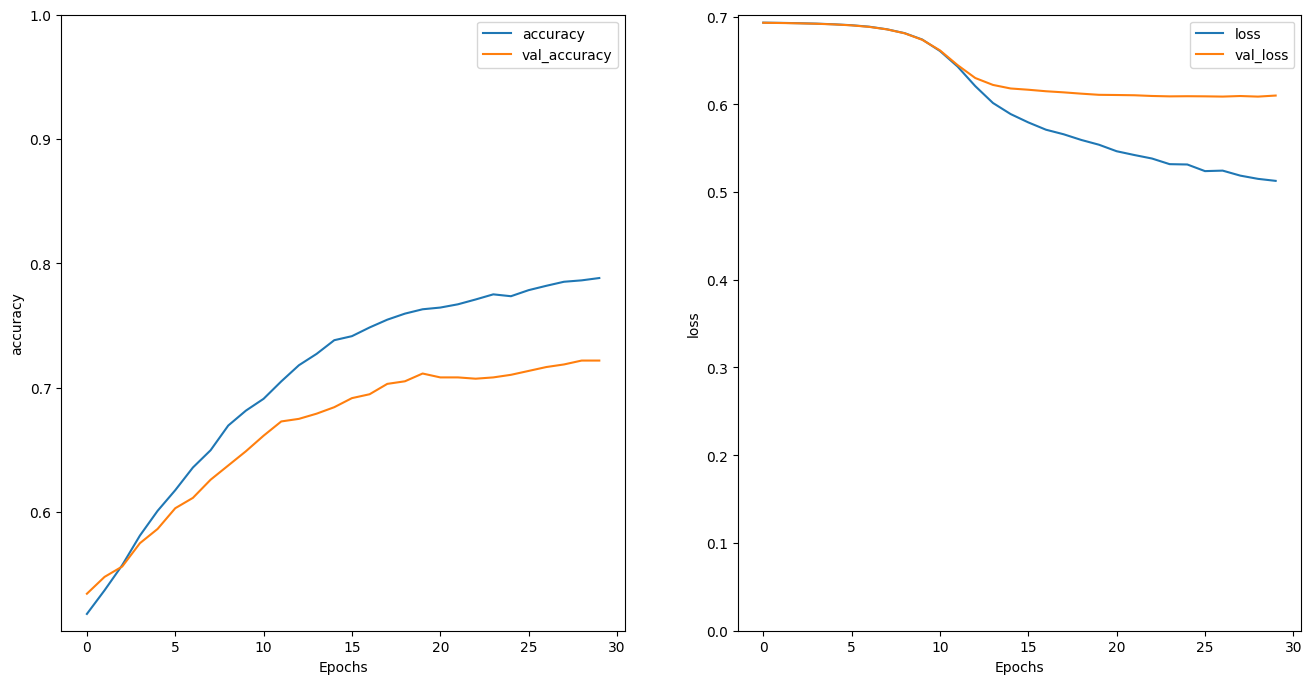

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

#Hybrid RNN-CNN

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization



rc_model = Sequential([
    encoder,
    Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


rc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = rc_model.fit(train_ds, epochs=30,
                    validation_data=val_ds)

Epoch 1/30
250/250 [==============================] - 13s 23ms/step - loss: 0.5998 - accuracy: 0.6660 - val_loss: 0.5603 - val_accuracy: 0.7210
Epoch 2/30
250/250 [==============================] - 4s 17ms/step - loss: 0.4852 - accuracy: 0.7756 - val_loss: 0.5848 - val_accuracy: 0.7090
Epoch 3/30
250/250 [==============================] - 4s 16ms/step - loss: 0.4326 - accuracy: 0.8100 - val_loss: 0.6372 - val_accuracy: 0.7190
Epoch 4/30
250/250 [==============================] - 4s 17ms/step - loss: 0.3644 - accuracy: 0.8514 - val_loss: 0.7131 - val_accuracy: 0.7100
Epoch 5/30
250/250 [==============================] - 4s 17ms/step - loss: 0.2952 - accuracy: 0.8855 - val_loss: 0.7837 - val_accuracy: 0.7170
Epoch 6/30
250/250 [==============================] - 4s 17ms/step - loss: 0.2645 - accuracy: 0.8985 - val_loss: 0.8887 - val_accuracy: 0.7020
Epoch 7/30
250/250 [==============================] - 4s 17ms/step - loss: 0.2268 - accuracy: 0.9164 - val_loss: 0.8840 - val_accuracy: 0.688

(0.0, 1.9869132310152053)

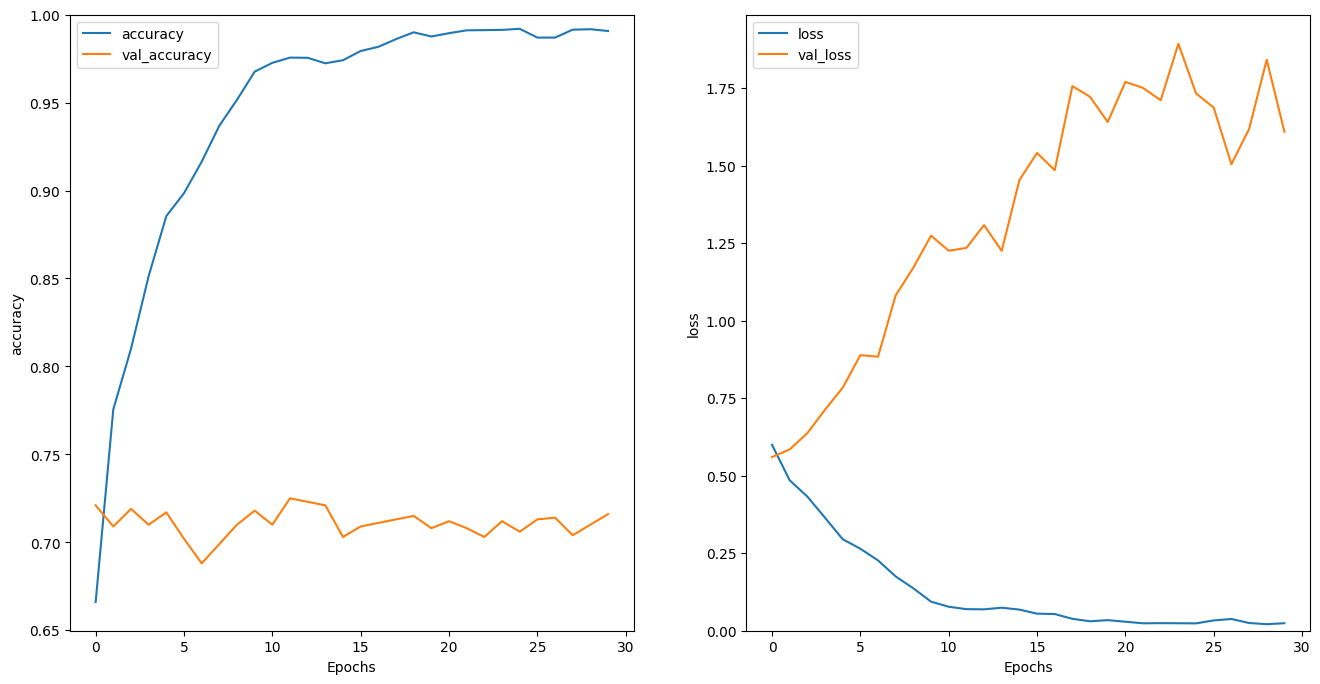

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

#BERT

In [17]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [18]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [59]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [60]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.40941042 -0.5673768  -0.9999843  -0.9645829   0.8787061  -0.14462382
 -0.7553924  -0.01419698  0.5539386   0.02157251 -0.77951187  0.06313901]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.21261835 -0.54964477  1.6522268  ... -0.45310682  0.5578211
  -0.8519269 ]
 [ 0.05303214 -0.55185044 -0.24887443 ... -0.10920342  0.40942535
  -0.30195022]
 [-0.4753009  -0.57321     0.3100408  ... -0.51567674  0.5689235
  -0.51024204]
 ...
 [ 0.42498922 -0.4388951   1.1993053  ... -0.37663943  0.3289809
  -0.46796626]
 [ 0.26002237 -0.37434548  1.1515182  ... -0.31171423  0.28399226
  -0.34318206]
 [ 0.04615509 -0.24607372  1.1613259  ... -0.2708525   0.35579973
  -0.2575763 ]]


In [61]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')(text_input)
  Bert_layer = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')(preprocessing_layer)
  Bert_output = Bert_layer['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(Bert_output)
  output_layer = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
  return tf.keras.Model(text_input, output_layer)

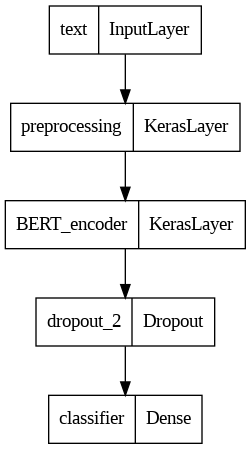

In [62]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)


In [63]:
loss = tf.keras.losses.BinaryCrossentropy()
metrics = tf.metrics.BinaryAccuracy()

In [64]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [65]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [66]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Epoch 1/5
250/250 [==============================] - 567s 2s/step - loss: 0.5745 - binary_accuracy: 0.6884 - val_loss: 0.5188 - val_binary_accuracy: 0.7460
Epoch 2/5
250/250 [==============================] - 546s 2s/step - loss: 0.4271 - binary_accuracy: 0.8066 - val_loss: 0.5537 - val_binary_accuracy: 0.7630
Epoch 3/5
250/250 [==============================] - 539s 2s/step - loss: 0.3252 - binary_accuracy: 0.8636 - val_loss: 0.6532 - val_binary_accuracy: 0.7730
Epoch 4/5
250/250 [==============================] - 518s 2s/step - loss: 0.2355 - binary_accuracy: 0.9089 - val_loss: 0.7565 - val_binary_accuracy: 0.7630
Epoch 5/5
250/250 [==============================] - 511s 2s/step - loss: 0.1874 - binary_accuracy: 0.9291 - val_loss: 0.7104 - val_binary_accuracy: 0.7660


In [67]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

32/32 [==============================] - 18s 573ms/step - loss: 0.6488 - binary_accuracy: 0.7850
Loss: 0.6488178372383118
Accuracy: 0.7850000262260437


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


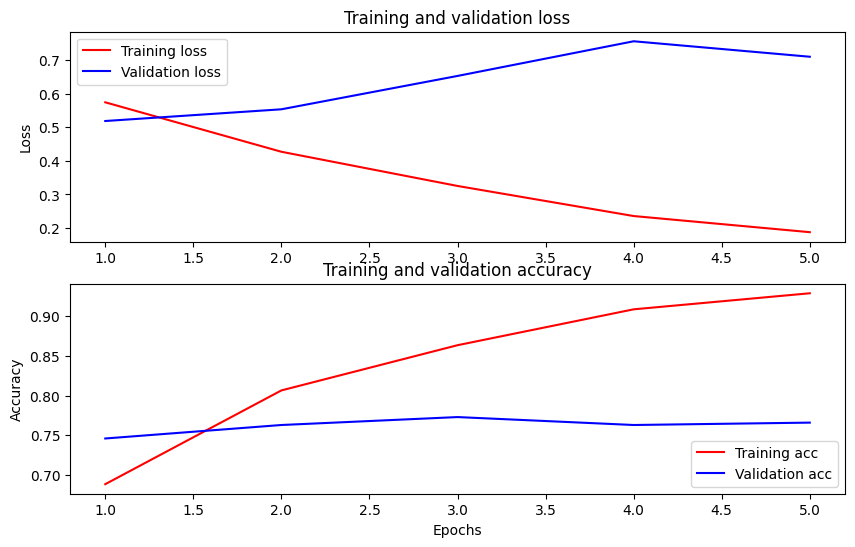

In [68]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=classifier_model.predict(test_ds)
y_pred = np.round(y_pred)

32/32 [==============================] - 19s 569ms/step


In [70]:
test_cm = confusion_matrix(test_df['sentiment'], y_pred)
print("Confusion Matrix\n",test_cm)

Confusion Matrix
 [[384  94]
 [121 401]]


In [71]:
test_report = classification_report(test_df['sentiment'],y_pred)
print("clasification report:\n", test_report)

clasification report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       478
           1       0.81      0.77      0.79       522

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.78      1000
weighted avg       0.79      0.79      0.79      1000



In [72]:
dataset_name = 'sentiment140'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [73]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [74]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such a bad behavior !',
    'The movie was great!',
    'The ugly robot.',
    'worst case scenerio.',
    'The movie was terrible...'
]

reloaded_results = reloaded_model(tf.constant(examples))
original_results = classifier_model(tf.constant(examples))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: this is such a bad behavior !  : score: 0.039266
input: The movie was great!           : score: 0.998095
input: The ugly robot.                : score: 0.161908
input: worst case scenerio.           : score: 0.073715
input: The movie was terrible...      : score: 0.007508

Results from the model in memory:
input: this is such a bad behavior !  : score: 0.039266
input: The movie was great!           : score: 0.998095
input: The ugly robot.                : score: 0.161908
input: worst case scenerio.           : score: 0.073716
input: The movie was terrible...      : score: 0.007508



In [22]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [23]:
def model_builder(hp):

  #creating a placeholder for each hyperparameter with a range of values for each hyperparameter we want to tune
  hp_units = hp.Int('units', min_value = 16, max_value = 1024, step = 32)
  hp_num_layers = hp.Int('num_layers', min_value = 1, max_value = 10, step=1)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_momentum=hp.Choice("momentum", values=(0.9, 0.99))
  hp_lr_decay_steps=hp.Choice("lr_decay_steps", values=(5000, 10000, 20000))
  hp_weight_decay=hp.Float("weight_decay",min_value=1e-3, max_value=1e-1, sampling='log')





  def classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')(text_input)
    Bert_layer = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')(preprocessing_layer)
    Bert_output = Bert_layer['pooled_output']
    net = tf.keras.layers.Dropout(hp_dropout_rate)(Bert_output)
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
    return tf.keras.Model(text_input, output_layer)

  #create a model and set its input and output
  classifiermodel = classifier_model()

  loss = tf.keras.losses.BinaryCrossentropy()
  metrics = tf.metrics.BinaryAccuracy()

  #learning rate scheduling
  epochs = 5
  steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
  num_train_steps = steps_per_epoch * epochs
  num_warmup_steps = int(0.1*num_train_steps)

  init_lr = hp_learningrate
  optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

  classifiermodel.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=[metrics])


  return classifiermodel

In [24]:
import keras_tuner as kt
objective = kt.Objective('val_binary_accuracy', direction='max')
tuner = kt.Hyperband(model_builder,
                     objective = objective,
                     max_epochs = 5,
                     factor = 3,
                     directory = 'hyperparameter_runs1',
                     project_name = 'sentiment-data')

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, mode='max', restore_best_weights=True)

In [26]:
tuner.search(train_ds,
            validation_data=val_ds,
            epochs=5,
            callbacks=[early_stopping],
            verbose = 1)

Trial 9 Complete [00h 30m 04s]
val_binary_accuracy: 0.5019999742507935

Best val_binary_accuracy So Far: 0.7699999809265137
Total elapsed time: 03h 06m 33s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
592               |144               |units
5                 |8                 |num_layers
0.2               |0                 |dropout
0.0025866         |0.00012467        |initial_learning_rate
0.99              |0.99              |momentum
5000              |10000             |lr_decay_steps
0.00174           |0.090458          |weight_decay
5                 |5                 |tuner/epochs
0                 |2                 |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/5
250/250 [==============================] - 467s 2s/step - loss: 0.7637 - binary_accuracy: 0.5027 - val_loss: 0.6946 - val_binary_accuracy: 0.4980
Epoch 2/5
104/250 [===========>..............

KeyboardInterrupt: ignored

In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of hidden layers is {best_hps.get('num_layers')}.
The optimal number of units in the first densely-connected layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}.
The optimal dropout is {best_hps.get('dropout')}.
""")

#Fine-tuning for classification.

In [ ]:
%pip install transformers[torch] datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
data = df_sample

In [ ]:
from datasets import Dataset
import pandas as pd
import numpy as np

data['sentiment']=np.where(data["sentiment"]==0, "negative" , "positive")

data= data[['text','sentiment']]

#drop null values
data.dropna(inplace=True)
data=data.reset_index(drop=True)


#convert pandas dataframe to a huggingface dataset for further processing
data_df= Dataset.from_pandas(data)

data_df

Dataset({
    features: ['text', 'sentiment'],
    num_rows: 10000
})

In [ ]:
df = data_df.train_test_split(test_size=0.2)

In [ ]:
from transformers import AutoTokenizer
#specify model's name
model_name = "t5-small"
#loading the tokenizer for the t5-small model
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
prefix = "negative or positive: "


def preprocess_function(examples):

    #adding prefix to each text in the batch
    inputs = [prefix + doc for doc in examples["text"]]

    #tokenizing the texts. Each text is truncated at max_length
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    #tokenizing the labels (summaries). labels are truncated at max_length
    labels = tokenizer(text_target=examples["sentiment"], max_length=3, truncation=True)

    # add the tokenized labels to the model_inputs
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_df= df.map(preprocess_function, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)

In [ ]:
import evaluate

f1= evaluate.load("f1")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred


    #decoding the predictions back from token_ids to tokens
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)


    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    #decode the labels back from token_ids to tokens
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    decoded_labels= [0 if l=="negative" else 1  for l in decoded_labels]
    decoded_preds= [0 if p=="negative" else 1  for p in decoded_preds]



    result = f1.compute(predictions=decoded_preds, references=decoded_labels)
    print(result)
    return {k: round(v, 4) for k, v in result.items()}



In [ ]:
from transformers import AutoConfig, AutoModelForSeq2SeqLM

# Download configuration from huggingface.co and cache.
config = AutoConfig.from_pretrained("t5-base")
model = AutoModelForSeq2SeqLM.from_config(config)

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [ ]:
from transformers import EarlyStoppingCallback

torch.cuda.empty_cache()
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/sentiment_model1",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
    metric_for_best_model="f1",
    load_best_model_at_end=True

)
early_stop = EarlyStoppingCallback()
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_df["train"],
    eval_dataset=tokenized_df["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
   callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
1,0.283000,0.285322,0.733700
2,0.264400,0.273943,0.733100
3,0.255100,0.260646,0.754600
4,0.240200,0.261239,0.750100
5,0.232500,0.259667,0.757200


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7336683417085428}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7330847096430474}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7545638945233266}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.750130958617077}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7572314049586778}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.283000,0.285322,0.733700
2,0.264400,0.273943,0.733100
3,0.255100,0.260646,0.754600
4,0.240200,0.261239,0.750100
5,0.232500,0.259667,0.757200
6,0.227800,0.261339,0.754100
7,0.223800,0.259315,0.759800
8,0.214400,0.267058,0.759600
9,0.219300,0.264362,0.759300
10,0.218000,0.265154,0.759000


{'f1': 0.7540810953133228}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7597938144329897}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7595854922279793}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7593254982115483}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'f1': 0.7590486039296794}


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=10000, training_loss=0.26318169174194334, metrics={'train_runtime': 960.3088, 'train_samples_per_second': 83.307, 'train_steps_per_second': 10.413, 'total_flos': 810640293494784.0, 'train_loss': 0.26318169174194334, 'epoch': 10.0})

In [ ]:
texts = df['test']['text'][:20]
for i,text in enumerate(texts):
  print(f"for text:{text} \n\ntrue label is: {df['test']['sentiment'][i]}")
  inputs = tokenizer(text, return_tensors="pt").input_ids.to("cuda")
  outputs = model.generate(inputs, max_new_tokens=3, do_sample=False)
  predicted_label=tokenizer.decode(outputs[0], skip_special_tokens=True)
  predicted_label="negative" if predicted_label=="negative" else "positive"
  print(f"model predicted {predicted_label}")

for text:ugh can sleep wishing was still in norman  

true label is: negative
model predicted positive
for text: christox m trying to do spree but second last thing is to protect gangleader or something and need 180 members to do it  

true label is: negative
model predicted positive
for text:playin around online colds definately do suck annoyed and about to get up make lunch 

true label is: negative
model predicted positive
for text:i get all there you tube videos from jbyoutube how can watch cherubs boot camp bringjbyoutubeback 

true label is: negative
model predicted positive
for text: mattman77777 you ll get there matt just take it slow and before you know it you ll be running stay strong  

true label is: positive
model predicted positive
for text:thinking of things to make so can eat want more maccas  

true label is: negative
model predicted positive
for text: hfwardhouse heehee course ll just cruise over in andy new yacht see andy launch thread p 

true label is: positive
mod